In [27]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sqlite3

sns.set(style="ticks", color_codes=True)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [18]:
#results
results_url = 'https://raw.githubusercontent.com/georgetown-analytics/Formula1/main/data/results.csv'
results_df = pd.read_csv(results_url, sep = ',', engine = 'python')

#statusID
status_url = 'https://raw.githubusercontent.com/georgetown-analytics/Formula1/main/data/status.csv'
status_df = pd.read_csv(status_url, sep = ',', engine = 'python')

In [21]:
#results_df.head()
status_df.head(10)

,statusId,status,familyStatus
0,1,Finished,4
1,2,Disqualified,3
2,3,Accident,1
3,4,Collision,2
4,5,Engine,6
5,6,Gearbox,6
6,7,Transmission,6
7,8,Clutch,6
8,9,Hydraulics,6
9,10,Electrical,6


In [34]:
#looking at the frequency of different status ID's
#ultimately, we need families to make reasonable sense of this because this chart isn't actually helpful
trimmed_results = results_df.loc[:,['statusId']]
trimmed_results.head()
#plt.hist(trimmed_results, bins=135)
#plt.show()

,statusId
0,1
1,1
2,1
3,1
4,1


In [41]:
#my goal here is to ascribe a family status to each row of results.csv based on statusID.
#I think to do this I have to join the two tables?

merged_df = trimmed_results.merge(status_df, on='statusId', how='left')
merged_df.head()

,statusId,status,familyStatus
0,1,Finished,4
1,1,Finished,4
2,1,Finished,4
3,1,Finished,4
4,1,Finished,4


In [ ]:
#now let's plot out how many of each family we have

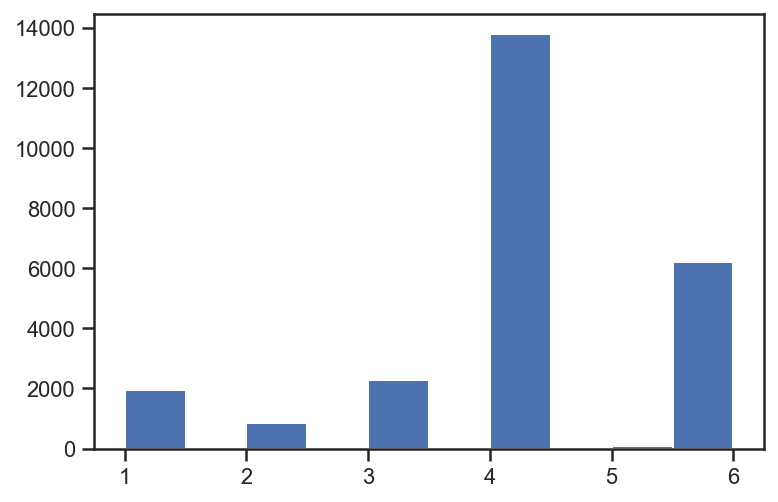

In [43]:
trimmed_merged_df = merged_df.loc[:,['familyStatus']]
plt.hist(trimmed_merged_df)
plt.show()

In [ ]:
#1 == accident
#2 == collision
#3 == disqualified or other
#4 == finished
#5 == tyre failure
#6 == Vehicle Failure